In [35]:
import numpy as np

In [36]:
file = './dataset/housing.data'

In [37]:
data = np.fromfile(file, sep=' ')

feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])
# print(data.shape)

In [38]:
'''划分数据集'''
ratio = 0.8
offset = int(data.shape[0]*ratio)
training_set = data[:offset]
testing_set = data[offset:]

In [39]:
'''归一化处理'''
maximums, minimums, avgs = \
                     training_set.max(axis=0), \
                     training_set.min(axis=0), \
     training_set.sum(axis=0) / training_set.shape[0]

for i in range(feature_nums):
    data[:, i] = (data[:, i]-minimums[i]) / (maximums[i]-minimums[i])

In [40]:
'''封装成函数'''
'''
@return
'''
def load_data(file):
    data = np.fromfile(file, sep=' ')
    
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_nums = len(feature_names)
    data = data.reshape([data.shape[0]//feature_nums, feature_nums])
    
    ratio = 0.8
    offset = int(data.shape[0]*ratio)
    training_data = data[:offset]
    
    maximums, minimums, avgs = \
        training_data.max(axis=0), \
        training_data.min(axis=0), \
        training_data.sum(axis=0) / training_data.shape[0]
    for i in range(feature_nums):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
    
    training_data = data[:offset]
    testing_data = data[offset:]
    
    return training_data, testing_data

In [73]:
class Network(object):
    def __init__(self,
                 num_of_weights,
                 input_dimension = 404):
        self.input_dimension = input_dimension
        self.num_of_weights = num_of_weights
        
        np.random.seed(0)
        self.w = np.random.randn(self.num_of_weights, 1)
        self.b = 0.
#         self.b = np.random.randn(self.input_dimension, 1)
    
    '''从特征和参数计算输出值的过程称为前向计算'''
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        
        return z
    
    def loss(self, z, y):
        error = z-y
        cost = error*error
        cost = np.mean(cost)
        
        return cost
    
    '''计算梯度'''
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        '''由于numpy.mean方法，将w由(13,1)变为了(13,)，
        不方便参与矩阵运算，因此需要修改维度'''
        gradient_w = gradient_w.reshape([gradient_w.shape[0], 1])
#         gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        
        return gradient_w, gradient_b
    
    '''更新梯度'''
    def update_gradient(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
    
    '''模型训练'''
    def train(self, iterations, learning_rate = 0.01):
        losses = []
        
        for i in range(iterations):
            z = self.forward(x) # 前向计算
            L = self.loss(z, y) # 计算损失
            gradient_w, gradient_b = self.gradient(x, y) # 计算梯度
            self.update_gradient(gradient_w, gradient_b) # 更新参数
            losses.append(L)
            
            if (i+1) % 100 == 0:
                print('iter {}, loss {}'.format(i, L))
                
        return losses

In [74]:
from matplotlib import pyplot as plt

iter 99, loss 0.9033048096880774
iter 199, loss 0.6419520361168637
iter 299, loss 0.48363025234390233
iter 399, loss 0.382618482740513
iter 499, loss 0.31576574305173283
iter 599, loss 0.2696061338236152
iter 699, loss 0.23625803901558054
iter 799, loss 0.2110681574640261
iter 899, loss 0.1912555092527351
iter 999, loss 0.17513006784373505
iter 1099, loss 0.16164173733233206
iter 1199, loss 0.15011936007939433
iter 1299, loss 0.14011913948915666
iter 1399, loss 0.1313361463603552
iter 1499, loss 0.12355226775271728
iter 1599, loss 0.11660526842915547
iter 1699, loss 0.11037013427693984
iter 1799, loss 0.10474760307581049
iter 1899, loss 0.09965693672426912
iter 1999, loss 0.09503122592310968
iter 2099, loss 0.09081423118228882
iter 2199, loss 0.08695817560615189
iter 2299, loss 0.08342214317050821
iter 2399, loss 0.08017087464669631
iter 2499, loss 0.07717383420569698
iter 2599, loss 0.07440446734795826
iter 2699, loss 0.07183959913589275
iter 2799, loss 0.0694589388130129
iter 2899, l

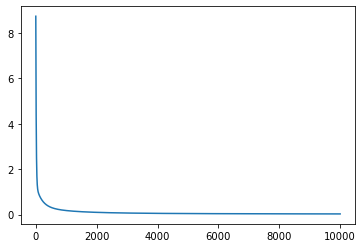

In [75]:
training_data, test_data = load_data(file)

x = training_data[:, :-1]
y = training_data[:, -1:]

num_of_weights = 13

net = Network(13)
num_of_iterations = 10000
losses = net.train(iterations = num_of_iterations)

plt_x = np.arange(num_of_iterations)
plt_y = np.array(losses)
plt.plot(plt_x, plt_y)
plt.show()

In [97]:
import numpy as np
import matplotlib.pyplot as plt

class Network(object):
    
    def __init__(self, 
                 num_of_weights,  
                learning_rate = 1e-2):
        self.num_of_weights = num_of_weights
        self.learning_rate = learning_rate
        
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        
        return z
    
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        
        gradient_w = (z - y ) * x
        gradient_w = np.mean(gradient_w, axis = 0)
        gradient_w = gradient_w.reshape([gradient_w.shape[0], 1])
        
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        
        return gradient_w, gradient_b
    
    def update_gradient(self, gradient_w, gradient_b):
        self.w = self.w - self.learning_rate * gradient_w
        self.b = self.b - self.learning_rate * gradient_b
    
    '''随机梯度下降法训练'''
    def train(self, training_date, num_of_epochs, batch_size = 10):
        N = len(training_data)
        losses = []
        
        for epoch_id in range(num_of_epochs):
            np.random.shuffle(training_data)
            mini_batches = [training_data[k:k+batch_size] for k in range(0, N, batch_size)]
            
            for iter_id, mini_batch in enumerate(mini_batches):
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                
                z = self.forward(x)
                loss = self.loss(z, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update_gradient(gradient_w, gradient_b)
                
                losses.append(loss)
                print('epoch:{} / iter:{}, loss:{}'
                      .format(epoch_id, iter_id, loss))
        
        return losses

epoch:0 / iter:0, loss:1.6239965700570502
epoch:0 / iter:1, loss:1.3237828274239793
epoch:0 / iter:2, loss:1.596317060265812
epoch:0 / iter:3, loss:1.4340867216342357
epoch:0 / iter:4, loss:0.5030301212057116
epoch:1 / iter:0, loss:1.4050623490658336
epoch:1 / iter:1, loss:1.32464471899485
epoch:1 / iter:2, loss:1.4622400287873223
epoch:1 / iter:3, loss:1.2436441455550535
epoch:1 / iter:4, loss:2.6856199371178073
epoch:2 / iter:0, loss:1.2309096607386705
epoch:2 / iter:1, loss:1.2414374018106349
epoch:2 / iter:2, loss:1.2376471409631151
epoch:2 / iter:3, loss:1.4431172606514435
epoch:2 / iter:4, loss:1.7368314310989423
epoch:3 / iter:0, loss:1.2332031108552635
epoch:3 / iter:1, loss:1.2353684979557533
epoch:3 / iter:2, loss:1.291718123669433
epoch:3 / iter:3, loss:1.25050488828556
epoch:3 / iter:4, loss:1.1719337077501653
epoch:4 / iter:0, loss:1.2210365409681438
epoch:4 / iter:1, loss:1.1945649695463523
epoch:4 / iter:2, loss:1.1660890831428152
epoch:4 / iter:3, loss:1.173314838562293

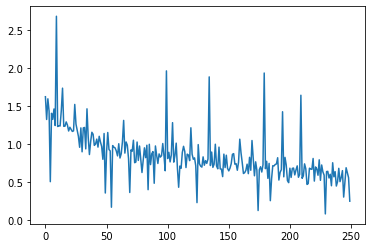

In [98]:
training_data, test_data = load_data(file)

net = Network(num_of_weights=13)
losses = net.train(training_data,num_of_epochs=50, batch_size=100)

plt_x = np.arange(len(losses))
plt_y = np.array(losses)

plt.plot(plt_x, plt_y)
plt.show()

In [100]:
print(net.w)
print(net.b)

[[ 0.12519888]
 [-0.45776172]
 [ 1.30499866]
 [-1.15576665]
 [-0.78971347]
 [ 0.85086294]
 [-0.10509367]
 [ 0.11285805]
 [-1.15014392]
 [-0.67568655]
 [ 1.56135473]
 [ 0.33336254]
 [-1.64004447]]
-0.31255664073697265
